In [2]:
import os
import sys
sys.path.insert(0,os.path.join('/project/venv/lib/python3.8/site-packages/'))
sys.path.insert(0,os.path.join('/venv/lib/python3.8/site-packages'))

def ignore_user_installs(username):
    ## avoid using user installs
    user_install_path = '/scratch/' + username + '/python/lib/python3.8/site-packages'
    if user_install_path in sys.path:
        sys.path.remove(user_install_path)

ignore_user_installs("starzew")

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['HTTP_PROXY'] = 'http://fp.cs.ovgu.de:3210/'
os.environ['HTTPS_PROXY'] = 'http://fp.cs.ovgu.de:3210/'

In [3]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import dill
import matplotlib as mpl
import matplotlib.patches as mpatches
from itertools import combinations

In [4]:
def load_pkl(file_name):
    with open(file_name, 'rb') as inp:
        data = dill.load(inp)
        
    return data

In [5]:
# plot attention head scores with additional mean values per layer
def plot_scores(scores, sev,title):
    fs = 13
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    fig, ax  = plt.subplots(3,1,sharex=True)
    fig.set_figwidth(480*px)
    fig.set_figheight(5)
    ylabels = ["Globality", "Verticality", "Diagonality"]
    labels = ['Head0', 'Head1', 'Head2', 'Head3', 'Head4', 'Head5', 'Head6', 'Head7','Mean', 'Mean_b']

    for i,key in enumerate(["g","v","d"]):
        ax[i].plot(range(1,7),scores[sev][key], linestyle="dashed")
        ax[i].plot(range(1,7),scores[sev][key].mean(axis=1), linewidth=2, label="mean", color="black")
        ax[i].plot(range(1,7),scores[sev][f"{key}_b"].mean(axis=1), linewidth=2, label="mean", color="grey")
        ax[i].set_ylabel(ylabels[i], fontsize=fs)
        ax[i].tick_params(axis='both', which='major', labelsize=fs) 
        
        ax[i].xaxis.set_ticks(list(range(1,7)))
        ax[i].set_xticklabels(["1","2","3","4","5","6"], fontsize=fs)
    
        if i == 0:
            ax[i].legend(labels,fontsize=fs,loc='upper center', bbox_to_anchor=(0.5, 1.7),ncols=5)
        if i == 2:
            ax[i].set_xlabel("Layer", fontsize=fs)
    
    #plt.tight_layout()
    plt.subplots_adjust(hspace=0.15)
    fig.align_labels()
    plt.savefig(f"figs/{title}.pdf",bbox_inches='tight')
    plt.show()
    

In [6]:
def plot_classifications_comparison_patches(counts,title):
    fs = 13
    px = 1/plt.rcParams['figure.dpi'] 
    fig = plt.figure()
    fig.set_figwidth(480*px)
    fig.set_figheight(3.5)
    width=0.1
    ax = plt.subplot()
    
    positions = [-2,-1,0,1,2,3]
    patterns = [ ".."  ,"oo", "//"]
    colors = mpl.colormaps['tab10'].colors


    for i,sev in enumerate(sevs):
        counts[sev].plot.bar(ax=ax, position=positions[i], label=sev, color=colors[i], width=width, align="center", stacked=True, linewidth=1, edgecolor="black", legend=False)
    
    plt.xlabel("Layer", fontsize=fs)
    plt.ylabel("Number of Heads", fontsize=fs)
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    
    ax.set_xlim(-0.5,5.5)
    ax.tick_params(axis='x', labelrotation=0)
    ax.set_xticklabels(["1","2","3","4","5","6"], fontsize=fs)
    
    bars = [thing for thing in ax.containers if isinstance(thing,mpl.container.BarContainer)]
    for i,bar in enumerate(bars):
        for j,patch in enumerate(bar):
            if i %3 == 0:
                patch.set_hatch(patterns[0])
            if i %3 == 1:
                patch.set_hatch(patterns[1])
            if i %3 == 2:
                patch.set_hatch(patterns[2])
    
    handles = []
    handles.append(mpatches.Patch( facecolor="white",hatch=patterns[0],label='Global'))
    handles.append(mpatches.Patch( facecolor="white",hatch=patterns[1],label='Vertical'))
    handles.append(mpatches.Patch(facecolor="white",hatch=patterns[2],label='Diagonal'))
    for i in range(len(sevs)):
        handles.append(mpatches.Patch(facecolor=colors[i],label=sevs[i]))
    ax.legend(handles=handles,loc='upper center', bbox_to_anchor=(0.5, 1.35), ncols=3)
    
    plt.savefig(f"figs/{title}.pdf", bbox_inches="tight")
    plt.show()

In [7]:
def plot_scores_sevs(scores,title):
    fs = 13
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    fig, ax  = plt.subplots(1,3,sharex=True)
    fig.set_figwidth(480*px)
    fig.set_figheight(3.5)
    ylabels = ["Globality", "Verticality", "Diagonality"]
    labels = ['Head0', 'Head1', 'Head2', 'Head3', 'Head4', 'Head5', 'Head6', 'Head7','Mean']
    sevs = ["v_l","l","m","h","all","c"]
    
    for sev in sevs:
        for i,key in enumerate(["g","v","d"]):
            ax[i].plot(range(1,7),scores[sev][key].mean(axis=1), label=sev)
            ax[i].set_title(ylabels[i])
            ax[i].tick_params(axis='both', which='major', labelsize=fs) 

            ax[i].xaxis.set_ticks(list(range(1,7)))
            ax[i].yaxis.set_ticks([])
            ax[i].set_xticklabels(["1","2","3","4","5","6"], fontsize=fs)
            ax[i].set_box_aspect(1)

            if i == 0:
                h, l = ax[i].get_legend_handles_labels()

            ax[i].set_xlabel("Layer", fontsize=fs)
            ax[i].set_box_aspect(1)
    
    plt.figlegend(h,l,fontsize=fs,loc='upper center', bbox_to_anchor=(0.5, 1.1),ncols=3)
    plt.tight_layout()
    plt.savefig(f"figs/{title}.pdf", bbox_inches="tight")
    plt.show()

In [8]:
def plot_scores_diffs2(scores, title):
    fs = 13
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    fig, ax  = plt.subplots(2,3,sharey="row",sharex=True)
    fig.set_figwidth(480*px)
    fig.set_figheight(5)
    ylabels = ["Globality", "Verticality", "Diagonality"]
    labels = ['Head0', 'Head1', 'Head2', 'Head3', 'Head4', 'Head5', 'Head6', 'Head7','Mean']
    
    variant = ["abs","rel"]
    sevs = ["v_l","l","m","h","all","c"]
    
    for sev in sevs:
        for i,key in enumerate(["g","v","d"]):
            ax[0][i].plot(range(1,7),scores[sev][f"{key}_b"].mean(axis=1)-scores[sev][key].mean(axis=1), label=sev)
            ax[1][i].plot(range(1,7),scores[sev][f"{key}_b"].mean(axis=1)/scores[sev][key].mean(axis=1), label=sev)
              
            for j in range(2):
                ax[0][i].set_title(ylabels[i])
                ax[j][i].tick_params(axis='both', which='major', labelsize=fs) 

                ax[j][i].xaxis.set_ticks(list(range(1,7)))
                ax[j][i].set_xticklabels(["1","2","3","4","5","6"], fontsize=fs)

            if i == 0:
                h, l = ax[i][0].get_legend_handles_labels()
                
            ax[1][i].set_xlabel("Layer", fontsize=fs)
            ax[0][0].set_ylabel("Diff", fontsize=fs)
            ax[1][0].set_ylabel("Rel", fontsize=fs)
            ax[0][i].set_box_aspect(1)
            ax[1][i].set_box_aspect(1)
    
    fig.align_labels()
    plt.figlegend(h,l,fontsize=fs,loc='upper center', bbox_to_anchor=(0.55, 1.15),ncols=3)
    plt.tight_layout()
    plt.savefig(f"figs/{title}.pdf", bbox_inches="tight")
    plt.show()

In [9]:
def plot_scores_ptft2(scores_pt,scores_ft, title):
    fs = 13
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    fig, ax  = plt.subplots(2,3,sharey="row",sharex=True)
    fig.set_figwidth(480*px)
    fig.set_figheight(5)
    ylabels = ["Globality", "Verticality", "Diagonality"]
    labels = ['Head0', 'Head1', 'Head2', 'Head3', 'Head4', 'Head5', 'Head6', 'Head7','Mean']
    
    variant = ["abs","rel"]
    sevs = ["v_l","l","m","h","all","c"]
    
    for sev in sevs:
        for i,key in enumerate(["g","v","d"]):
            ax[0][i].plot(range(1,7),scores_pt[sev][key].mean(axis=1)-scores_ft[sev][key].mean(axis=1), label=sev)
            ax[1][i].plot(range(1,7),scores_pt[sev][key].mean(axis=1)/scores_ft[sev][key].mean(axis=1), label=sev)
              
            
            for j in range(2):
                ax[0][i].set_title(ylabels[i])
                ax[j][i].tick_params(axis='both', which='major', labelsize=fs) 

                ax[j][i].xaxis.set_ticks(list(range(1,7)))
                ax[j][i].set_xticklabels(["1","2","3","4","5","6"], fontsize=fs)

            if i == 0:
                h, l = ax[i][0].get_legend_handles_labels()
                
            ax[1][i].set_xlabel("Layer", fontsize=fs)
            ax[0][0].set_ylabel("Diff", fontsize=fs)
            ax[1][0].set_ylabel("Rel", fontsize=fs)
           
    fig.align_labels()
    plt.figlegend(h,l,fontsize=fs,loc='upper center', bbox_to_anchor=(0.55, 1.15),ncols=3)
    plt.tight_layout()
    plt.savefig(f"figs/{title}.pdf", bbox_inches="tight")
    plt.show()

In [10]:
def plot_scores_ptft_and_diffs(scores_pt,scores_ft, title):
    fs = 13
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    fig, ax  = plt.subplots(2,3,sharey=False,sharex=True)
    fig.set_figwidth(480*px)
    fig.set_figheight(4.5)
    ylabels = ["Globality", "Verticality", "Diagonality"]
    
    sevs = ["v_l","l","m","h","all","c"]
    
    for sev in sevs:
        for i,key in enumerate(["g","v","d"]):
            if key == "g":
                ax[0][i].plot(range(1,7),scores_pt[sev][key].mean(axis=1)/scores_pt[sev][f"{key}_b"].mean(axis=1), label=sev)
                ax[1][i].plot(range(1,7),scores_ft[sev][key].mean(axis=1)/scores_pt[sev][key].mean(axis=1), label=sev)
            else:
                ax[0][i].plot(range(1,7),scores_pt[sev][f"{key}_b"].mean(axis=1)/scores_pt[sev][key].mean(axis=1), label=sev)
                ax[1][i].plot(range(1,7),scores_pt[sev][key].mean(axis=1)/scores_ft[sev][key].mean(axis=1), label=sev) 
            ax[0][i].plot(range(1,7),[1,1,1,1,1,1],ls=(0, (1, 5)),lw=0.8,color="black")
            ax[1][i].plot(range(1,7),[1,1,1,1,1,1],ls=(0, (1, 5)),lw=0.8,color="black")
              
            
            for j in range(2):
                ax[0][i].set_title(ylabels[i])
                ax[j][i].tick_params(axis='both', which='major', labelsize=fs) 

                ax[j][i].xaxis.set_ticks(list(range(1,7)))
                ax[j][i].set_xticklabels(["1","2","3","4","5","6"], fontsize=fs)

            if i == 0:
                h, l = ax[i][0].get_legend_handles_labels()
                
            ax[1][i].set_xlabel("Layer", fontsize=fs)
            ax[0][0].set_ylabel("Rel - B", fontsize=fs)
            ax[1][0].set_ylabel("Rel - FT", fontsize=fs)
           
    fig.align_labels()
    plt.figlegend(h,l,fontsize=fs,loc='upper center', bbox_to_anchor=(0.55, 1.15),ncols=3)
    plt.tight_layout()
    plt.savefig(f"figs/{title}.pdf", bbox_inches="tight")
    plt.show()

In [11]:
def plot_diffs_ptft2(counts_ft,counts_pt,counts_ft_b,counts_pt_b,title):
    fs = 13
    px = 1/plt.rcParams['figure.dpi'] 
    fig, ax = plt.subplots(2,1, sharex=True)
    fig.set_figwidth(480*px)
    width=0.1

    positions = [-2,-1,0,1,2,3]
    patterns = [ ".."  ,"oo", "//"]
    colors = mpl.colormaps['tab10'].colors


    for i,sev in enumerate(sevs):
        #print(sev)
        (counts_ft[sev]-counts_pt[sev]).plot.bar(ax=ax[1], position=positions[i], label=sev, color=colors[i], width=width, align="center", stacked=True, edgecolor="black", legend=False)
        (counts_ft_b[sev]-counts_pt_b[sev]).plot.bar(ax=ax[0], position=positions[i], label=sev, color=colors[i], width=width, align="center", stacked=True, edgecolor="black", legend=False)
    
    for a in ax:
        a.set_xlabel("Layer", fontsize=fs)
        a.set_xticklabels(["1","2","3","4","5","6"], fontsize=fs)
        #a.set_ylabel("Number of Heads", fontsize=fs)
        #a.xticks(fontsize=fs)
        #a.yticks(fontsize=fs)
    
    
        a.set_xlim(-0.5,5.5)
        a.tick_params(axis='x', labelrotation=0, labelsize=fs)
        a.tick_params(axis='y', labelsize=fs)
        a.set_yticks([-2,-1,0,1,2])    
    
        bars = [thing for thing in a.containers if isinstance(thing,mpl.container.BarContainer)]
        for i,bar in enumerate(bars):
            for j,patch in enumerate(bar):
                if i %3 == 0:
                    patch.set_hatch(patterns[0])
                if i %3 == 1:
                    patch.set_hatch(patterns[1])
                if i %3 == 2:
                    patch.set_hatch(patterns[2])
    
    handles = []
    handles.append(mpatches.Patch( facecolor="white",hatch=patterns[0],label='Global'))
    handles.append(mpatches.Patch( facecolor="white",hatch=patterns[1],label='Vertical'))
    handles.append(mpatches.Patch(facecolor="white",hatch=patterns[2],label='Diagonal'))
    for i in range(len(sevs)):
        handles.append(mpatches.Patch(facecolor=colors[i],label=sevs[i]))
        
    fig.supylabel('Difference in Number of Heads', fontsize=fs)
    plt.figlegend(handles=handles,loc='upper center', bbox_to_anchor=(0.5, 1.125), ncols=3)
    plt.savefig(f"figs/{title}.pdf", bbox_inches="tight")
    plt.show()

# Head Scores

In [12]:
scores_pt = dict()
for sev in ["v_l","l","m","h","all","c"]:
    variant = "pt"
    scores_pt[sev] = {
        'g':pd.read_csv(f"head_scores/g_scores_{sev}_{variant}_10.csv", index_col=0),
        'v':pd.read_csv(f"head_scores/v_scores_{sev}_{variant}_10.csv", index_col=0),
        'd':pd.read_csv(f"head_scores/d_scores_{sev}_{variant}_10.csv", index_col=0),
        'g_b': pd.read_csv(f"head_scores/g_scores_{sev}_{variant}_10_b.csv", index_col=0),
        'v_b': pd.read_csv(f"head_scores/v_scores_{sev}_{variant}_10_b.csv", index_col=0),
        'd_b': pd.read_csv(f"head_scores/d_scores_{sev}_{variant}_10_b.csv", index_col=0),
                }
scores_ft = dict()
for sev in ["v_l","l","m","h","all","c"]:
    variant = "ft"
    scores_ft[sev] = {
        'g':pd.read_csv(f"head_scores/g_scores_{sev}_{variant}_10.csv", index_col=0),
        'v':pd.read_csv(f"head_scores/v_scores_{sev}_{variant}_10.csv", index_col=0),
        'd':pd.read_csv(f"head_scores/d_scores_{sev}_{variant}_10.csv", index_col=0),
        'g_b': pd.read_csv(f"head_scores/g_scores_{sev}_{variant}_10_b.csv", index_col=0),
        'v_b': pd.read_csv(f"head_scores/v_scores_{sev}_{variant}_10_b.csv", index_col=0),
        'd_b': pd.read_csv(f"head_scores/d_scores_{sev}_{variant}_10_b.csv", index_col=0),
                }

## Head Scores for Specific Intelligibility

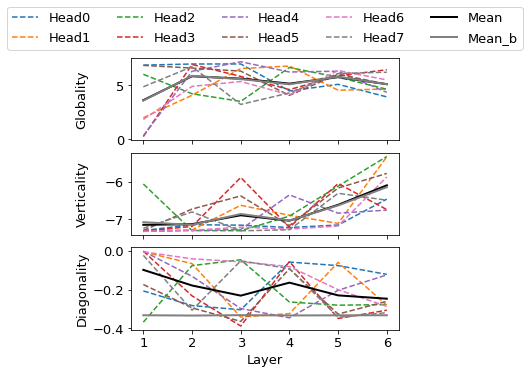

In [14]:
sev = "v_l"
title = f"head_scores_{sev}"
plot_scores(scores_pt, sev, title)

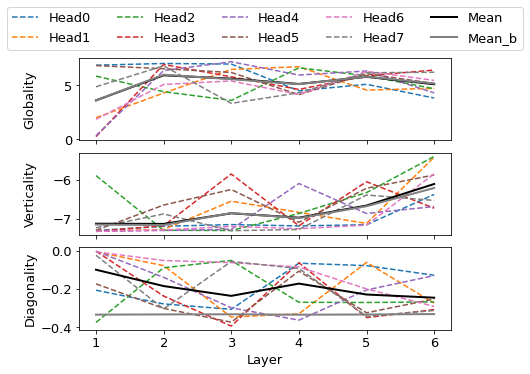

In [15]:
sev = "l"
title = f"head_scores_{sev}"
plot_scores(scores_pt, sev, title)

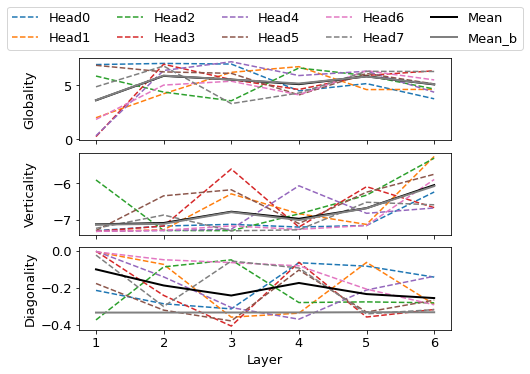

In [16]:
sev = "m"
title = f"head_scores_{sev}"
plot_scores(scores_pt, sev, title)

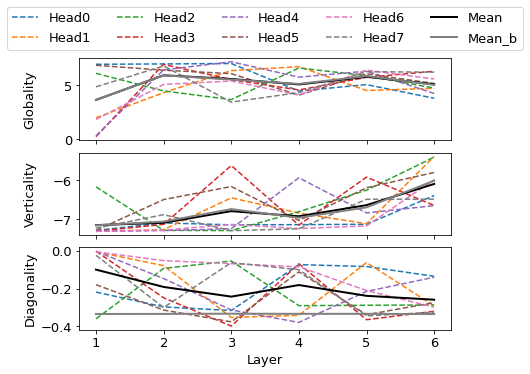

In [17]:
sev = "h"
title = f"head_scores_{sev}"
plot_scores(scores_pt, sev, title)

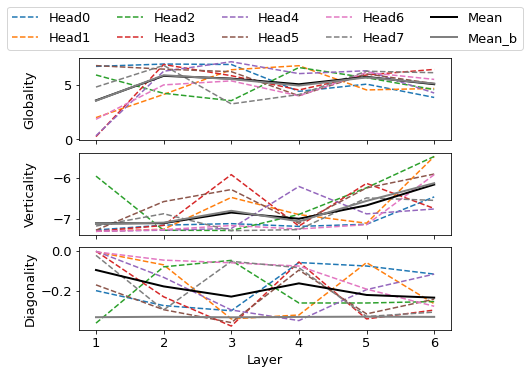

In [18]:
sev = "all"
title = f"head_scores_{sev}"
plot_scores(scores_pt, sev, title)

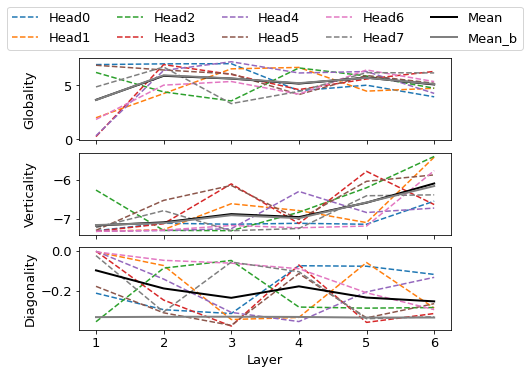

In [85]:
sev = "c"
title = f"head_scores_{sev}"
plot_scores(scores_pt, sev, title)

## Head Scores for all Intelligibilities, Averaged over Heads

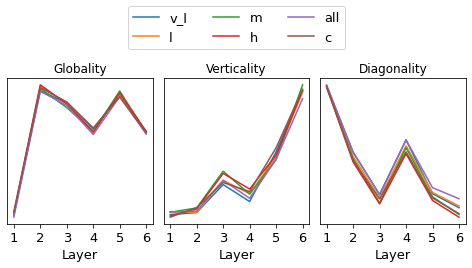

In [82]:
title = "scores_sevs_pt"
plot_scores_sevs(scores_pt, title)

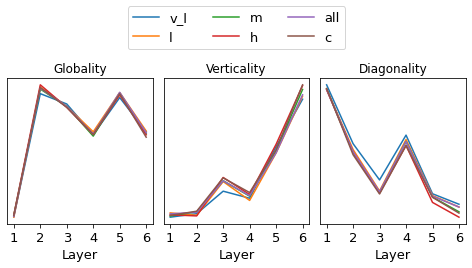

In [83]:
title = "scores_sevs_ft"
plot_scores_sevs(scores_ft,title)

## Differences to Baselines for all Intelligibilities

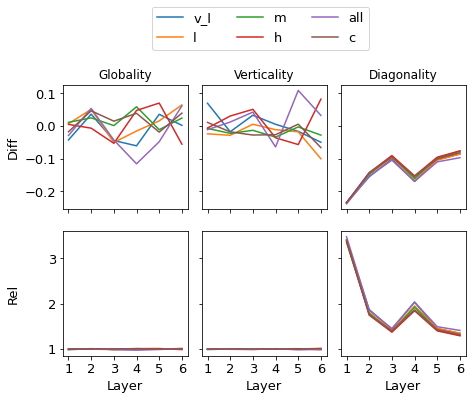

In [87]:
title = "scores_diffs_pt"
plot_scores_diffs2(scores_pt, title)

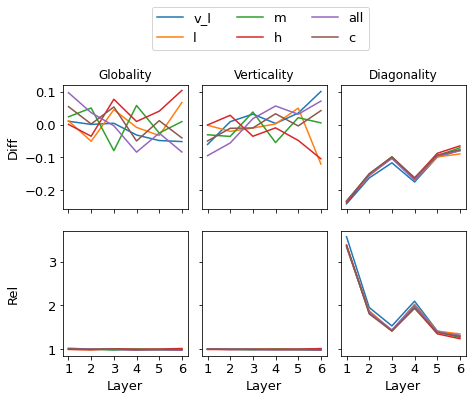

In [88]:
title = "scores_diffs_ft"
plot_scores_diffs2(scores_ft, title)

## Changes in Head Scores Between PT & FT (avg. over heads)

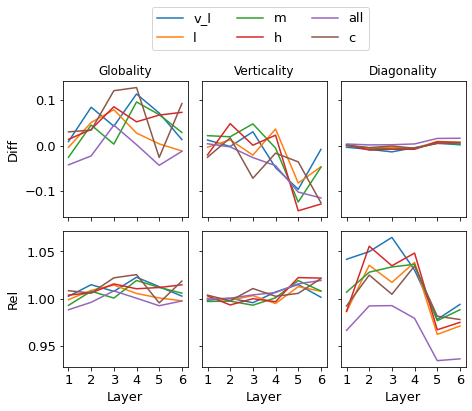

In [91]:
title = "scores_diffs_ptft"
plot_scores_ptft2(scores_pt, scores_ft, title)

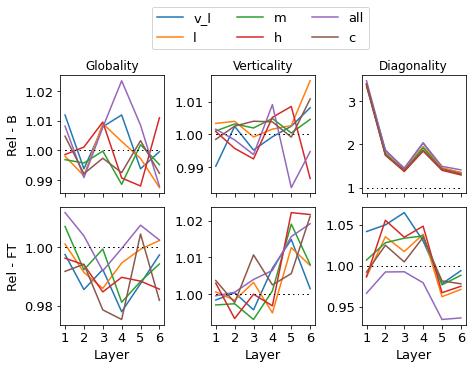

In [120]:
title = "scores_rel_b_ptft"
plot_scores_ptft_and_diffs(scores_pt, scores_ft, title)

# Head Classification

In [13]:
classifications_pt = dict()
classifications_ft = dict()
classifications_pt_b = dict()
classifications_ft_b = dict()

counts_pt = dict()
counts_ft = dict()
counts_pt_b = dict()
counts_ft_b = dict()

sevs = ["v_l","l","m","h","all","c"]

for sev in sevs:
    classifications_pt[sev] = load_pkl(f'head_scores/classifications_{sev}_pt_10.pkl')
    classifications_pt_b[sev] = load_pkl(f'head_scores/classifications_{sev}_pt_10_b.pkl')
    classifications_ft[sev] = load_pkl(f'head_scores/classifications_{sev}_ft_10.pkl')
    classifications_ft_b[sev] = load_pkl(f'head_scores/classifications_{sev}_ft_10_b.pkl')

    
    counts_pt[sev] = classifications_pt[sev].apply(pd.Series.value_counts, axis=1)
    counts_pt_b[sev]  = classifications_pt_b[sev].apply(pd.Series.value_counts, axis=1)
    counts_ft[sev]  = classifications_ft[sev].apply(pd.Series.value_counts, axis=1)
    counts_ft_b[sev]  = classifications_ft_b[sev].apply(pd.Series.value_counts, axis=1)
    
# change column names for plot
for counts in [counts_pt, counts_pt_b, counts_ft, counts_ft_b]:
    for sev in sevs:
        counts[sev].columns = ["Global", "Vertical", "Diagonal"]

## Comparison of Classifications Between Sevs

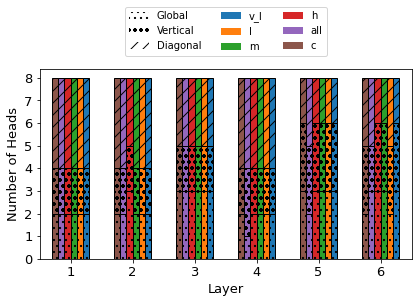

In [102]:
title = "counts_pt"
plot_classifications_comparison_patches(counts_pt, title)

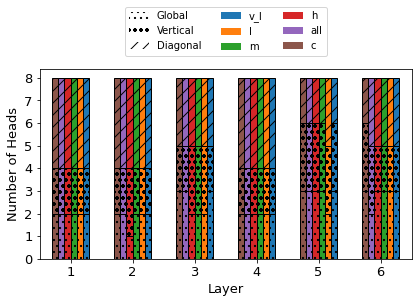

In [103]:
title = "counts_ft"
plot_classifications_comparison_patches(counts_ft,title)

## Comparison of Classifications Between PT&FT

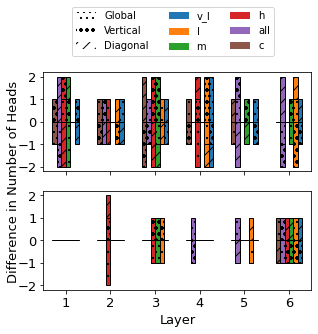

In [14]:
title = "counts_diffs_ptft"
plot_diffs_ptft2(counts_ft,counts_pt, counts_ft_b, counts_pt_b,title)

# Head Ablation

In [15]:
expnames = ["exp_asr_pt", "exp_pr_pt", "exp_sev_pt", "exp_sid_pt","exp_asr_ft", "exp_pr_ft", "exp_sev_ft", "exp_sid_ft"]
cats = ["global","vertical","diagonal"]

result_layerwise = dict()
result_total = dict()

for exp in expnames:
    result_layerwise[exp[4:]] = dict()
    result_total[exp[4:]] = dict()
    for cat in cats: 
        result_layerwise[exp[4:]][cat] = load_pkl(f"head_scores/ablation_{exp}_{cat}_layerwise_{exp[-2:]}.pkl")
        result_total[exp[4:]][cat] = load_pkl(f"head_scores/ablation_{exp}_{cat}_total_{exp[-2:]}.pkl")


## Layer-Wise Head Ablation

In [16]:
def get_combination_nums(n_heads):
    nums = []
    for i in range(n_heads+1):
        nums.append(len((list(combinations(list(range(n_heads)),i)))))
    return nums

In [17]:
def get_n_heads(gvd,layer,ptft):
    masks = load_pkl(f"head_scores/masks_{gvd}_{layer}_{ptft}.pkl")
    # look at first mask with n_heads masked heads
    mask = masks[-1]
    # count occurcences of "1" in layer
    n_heads = torch.unique(mask[layer], return_counts=True)[-1][0]
    
    return n_heads
    

In [18]:
def merge_combinations(infos,nums):
    test = []

    i = 0
    for num in nums:
        if num == 1:
            test.append(infos[i])
            i +=1
        if num > 1:
            mean = []
            for j in range(num):
                mean.append(infos[i+j])  
            i+=num
            mean = np.mean(np.array(mean))
            test.append(mean)
    return  test

In [27]:
def plot_ablation_results(results_list,title):
    fig,axes = plt.subplots(4,6,sharex=True,sharey="row")
    fig.set_figheight(5)
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    fig.set_figwidth(480*px)
    fs=13

    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

    for i,results in enumerate(results_list):
        for layer,ax in enumerate(axes[i]):
            for gvd in ["global","vertical","diagonal"]:
                for ptft in ["pt","ft"]:
                    n_heads = len(results[ptft][gvd][layer])
                    ax.plot([(100/(n_heads-1))*i for i in range(n_heads)],results[ptft][gvd][layer], label=f"{gvd[0].upper()} {ptft.upper()}")
            if i == 0:
                ax.set_title(f"Layer {layer+1}")
            ax.set_xticks(list(range(0,150,50)))
            ax.tick_params(axis='both', which='major', labelsize=fs-1)

    axes[0][0].set_ylabel("CER", fontsize=fs)
    axes[1][0].set_ylabel("PER", fontsize=fs)
    axes[2][0].set_ylabel("Acc", fontsize=fs)
    axes[3][0].set_ylabel("Acc", fontsize=fs)


    axes[0][5].yaxis.set_label_position("right")
    axes[1][5].yaxis.set_label_position("right")
    axes[2][5].yaxis.set_label_position("right")
    axes[3][5].yaxis.set_label_position("right")
    axes[0][5].set_ylabel("ASR", fontsize=fs)
    axes[1][5].set_ylabel("PR", fontsize=fs)
    axes[2][5].set_ylabel("SID", fontsize=fs)
    axes[3][5].set_ylabel("IDC", fontsize=fs)

    h,l, = axes[0][0].get_legend_handles_labels()
    plt.figlegend(h,l,loc='upper center', bbox_to_anchor=(0.535, 1.15), ncols=3, fontsize=fs)
    fig.supxlabel("Masked Heads [%]",fontsize=fs, y=0.04,x=0.535)
    fig.align_labels()
    #fig.supylabel("CER",fontsize=fs)
    plt.tight_layout()
    plt.savefig(f"figs/{title}.pdf",bbox_inches="tight")

In [20]:
# extract CER for ASR, ACC for other tasks from results

asr_cers_l = {"pt":dict(),"ft":dict()}
pr_pers_l = {"pt":dict(),"ft":dict()}
sev_accs_l = {"pt":dict(),"ft":dict()}
sid_accs_l = {"pt":dict(),"ft":dict()}

for ptft in ["pt","ft"]:
    for cat in cats:
        asr_cers_l[ptft][cat] = dict()
        pr_pers_l[ptft][cat] = dict()
        sev_accs_l[ptft][cat] = dict()
        sid_accs_l[ptft][cat] = dict()
        for i in range(6):
            asr_cers_l[ptft][cat][i] = []
            pr_pers_l[ptft][cat][i] = []
            sev_accs_l[ptft][cat][i] = []
            sid_accs_l[ptft][cat][i] = []
            
            
            for info in result_layerwise[f"asr_{ptft}"][cat][i]:
                asr_cers_l[ptft][cat][i].append(info["cer"])
            
            # avg result for all combinations of same amount of masked heads
            n_heads = get_n_heads(cat,i,ptft)
            nums=get_combination_nums(n_heads)
            asr_cers_l[ptft][cat][i] = merge_combinations(asr_cers_l[ptft][cat][i],nums)
            
            for info in result_layerwise[f"pr_{ptft}"][cat][i]:
                pr_pers_l[ptft][cat][i].append(info["per"])
             
            for info in result_layerwise[f"sev_{ptft}"][cat][i]:
                    sev_accs_l[ptft][cat][i].append(info["accuracy"])
            for info in result_layerwise[f"sid_{ptft}"][cat][i]:
                    sid_accs_l[ptft][cat][i].append(info["accuracy"])
                        
            
            pr_pers_l[ptft][cat][i] = merge_combinations(pr_pers_l[ptft][cat][i],nums)
            sev_accs_l[ptft][cat][i] = merge_combinations(sev_accs_l[ptft][cat][i],nums)
            sid_accs_l[ptft][cat][i] = merge_combinations(sid_accs_l[ptft][cat][i],nums)

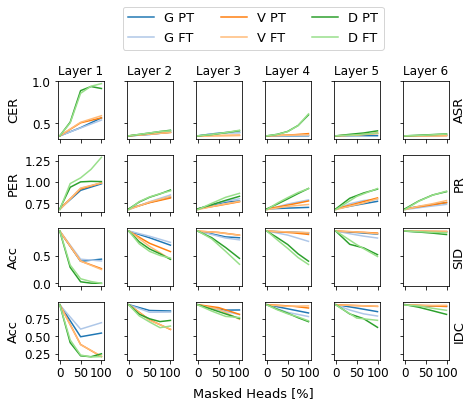

In [28]:
results = [asr_cers_l, pr_pers_l, sid_accs_l, sev_accs_l]
title="ablation_layerwise"
plot_ablation_results(results,title)

## Total Head Ablation

In [25]:
def plot_ablation_results_per_task_ptft(metrics,title):
    fig, ax = plt.subplots(4,1, sharex=True)
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    fig.set_figwidth(350*px)
    fig.set_figheight(5)
    task_names = ["ASR","PR","SID","IDC"]
    ylabels = ["CER","PER","ACC","ACC"]
    fs=13
    
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

    for i,metric in enumerate(metrics):
        n_global_pt = metrics[i]["pt"]["global"].shape[-1]
        n_vertical_pt = metrics[i]["pt"]["vertical"].shape[-1]
        n_diagonal_pt = metrics[i]["pt"]["diagonal"].shape[-1]
        n_global_ft = metrics[i]["ft"]["global"].shape[-1]
        n_vertical_ft = metrics[i]["ft"]["vertical"].shape[-1]
        n_diagonal_ft = metrics[i]["ft"]["diagonal"].shape[-1]
        
        ax[i].plot([(100/(n_global_pt-1))*i for i in range(n_global_pt)],np.mean(metrics[i]["pt"]["global"], axis=0), label="G PT")
        ax[i].plot([(100/(n_global_ft-1))*i for i in range(n_global_ft)],np.mean(metrics[i]["ft"]["global"], axis=0), label="G FT")
        ax[i].plot([(100/(n_vertical_pt-1))*i for i in range(n_vertical_pt)],np.mean(metrics[i]["pt"]["vertical"], axis=0), label="V PT")
        ax[i].plot([(100/(n_vertical_ft-1))*i for i in range(n_vertical_ft)],np.mean(metrics[i]["ft"]["vertical"], axis=0), label="V FT")
        ax[i].plot([(100/(n_diagonal_pt-1))*i for i in range(n_diagonal_pt)],np.mean(metrics[i]["pt"]["diagonal"], axis=0), label="D PT")
        ax[i].plot([(100/(n_diagonal_ft-1))*i for i in range(n_diagonal_ft)],np.mean(metrics[i]["ft"]["diagonal"], axis=0), label="D FT")
        ax[i].set_xticks(list(range(0,120,20)))
        ax[i].set_title(task_names[i])
        ax[i].set_ylabel(ylabels[i], fontsize=fs)
        ax[i].tick_params(axis='both', which='major', labelsize=fs)
        h, l = ax[i].get_legend_handles_labels()

        if i == 3:
            ax[i].set_xlabel("Masked Heads [%]", fontsize=fs)

    plt.figlegend(h,l,loc='upper center', bbox_to_anchor=(0.575, 1.125), ncols=3, fontsize=fs)
    fig.align_labels()
    plt.tight_layout()
    plt.savefig(f"figs/{title}.pdf", bbox_inches="tight")
    plt.show()

In [22]:
asr_cers = {"pt":dict(),"ft":dict()}
pr_pers = {"pt":dict(),"ft":dict()}
sev_accs = {"pt":dict(),"ft":dict()}
sid_accs = {"pt":dict(),"ft":dict()}

for ptft in ["pt","ft"]:
    for cat in cats:
        #print(cat)
        asr_cers[ptft][cat] = dict()
        pr_pers[ptft][cat] = dict()
        sev_accs[ptft][cat] = dict()
        sid_accs[ptft][cat] = dict()
        for i in range(10):
            asr_cers[ptft][cat][i] = []
            pr_pers[ptft][cat][i] = []
            sev_accs[ptft][cat][i] = []
            sid_accs[ptft][cat][i] = []
            for info in result_total[f"asr_{ptft}"][cat][i]:
                asr_cers[ptft][cat][i].append(info["cer"])
            for info in result_total[f"pr_{ptft}"][cat][i]:
                    pr_pers[ptft][cat][i].append(info["per"])
            for info in result_total[f"sev_{ptft}"][cat][i]:
                    sev_accs[ptft][cat][i].append(info["accuracy"])
            for info in result_total[f"sid_{ptft}"][cat][i]:
                    sid_accs[ptft][cat][i].append(info["accuracy"])

        asr_cers[ptft][cat] = np.array(list(asr_cers[ptft][cat].values()))
        pr_pers[ptft][cat] = np.array(list(pr_pers[ptft][cat].values()))
        sev_accs[ptft][cat] = np.array(list(sev_accs[ptft][cat].values()))
        sid_accs[ptft][cat] = np.array(list(sid_accs[ptft][cat].values()))

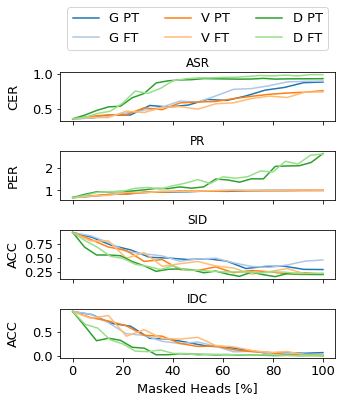

In [26]:
metrics = [asr_cers,pr_pers, sev_accs,sid_accs]
title="ablation_total"
plot_ablation_results_per_task_ptft(metrics,title)